In [1]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


In [2]:
def get_uber_data(api_key):
    url = "https://api.uber.com/v1/requests"
    headers = {"Authorization": "Bearer " + api_key}
    response = requests.get(url, headers=headers)
    data = response.json()
    return data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('uberdata.csv')


In [6]:
df.head() # to see the first few rows of the dataset
df.info() # to get the summary of the dataset
df.describe() # to get the statistical summary of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ride Volume  78 non-null     object 
 1   Unnamed: 1   78 non-null     object 
 2   Unnamed: 2   70 non-null     object 
 3   Unnamed: 3   24 non-null     object 
 4   Unnamed: 4   25 non-null     object 
 5   Unnamed: 5   75 non-null     object 
 6   Unnamed: 6   1 non-null      float64
 7   Unnamed: 7   3 non-null      float64
 8   Unnamed: 8   74 non-null     object 
 9   Unnamed: 9   74 non-null     float64
 10  Unnamed: 10  2 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  18 non-null     object 
 13  Unnamed: 13  27 non-null     object 
 14  Unnamed: 14  26 non-null     object 
 15  Unnamed: 15  18 non-null     object 
 16  Unnamed: 16  12 non-null     object 
 17  Unnamed: 17  12 non-null     object 
dtypes: float64(5), object(13)
memory usage: 11.2+ KB


,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,1.0,3.000000,74.000000,2.00000,0.0
mean,297.0,9682.926075,16622.148649,1956.50000,NaN
std,NaN,10817.464029,13762.541695,184.55487,NaN
min,297.0,1.778226,190.000000,1826.00000,NaN
25%,297.0,3844.889113,5776.750000,1891.25000,NaN
50%,297.0,7688.000000,13054.000000,1956.50000,NaN
75%,297.0,14523.500000,24280.000000,2021.75000,NaN
max,297.0,21359.000000,52332.000000,2087.00000,NaN


In [7]:
df = pd.read_csv('uberd.csv')

In [8]:


print(df.head())

# Check for missing values
print(df.isnull().sum())

# Remove any rows with missing values
df.dropna(inplace=True)

      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  
START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [9]:
print(df.columns)


Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')


In [10]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

# Create a new column for trip duration
df['Duration'] = (df['END_DATE*'] - df['START_DATE*']).dt.seconds/3600

# Remove any rows with negative duration
df = df[df['Duration'] > 0]

# Convert Miles Driven column to numeric format
df['MILES*'] = pd.to_numeric(df['MILES*'], errors='coerce')

# Remove any rows with missing or invalid miles driven values
df = df[~df['MILES*'].isnull()]

# View the cleaned dataset
print(df.head())

          START_DATE*           END_DATE* CATEGORY*           START*  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

             STOP*  MILES*         PURPOSE*  Duration  
0      Fort Pierce     5.1   Meal/Entertain  0.100000  
2      Fort Pierce     4.8  Errand/Supplies  0.216667  
3      Fort Pierce     4.7          Meeting  0.233333  
4  West Palm Beach    63.7   Customer Visit  1.116667  
5  West Palm Beach     4.3   Meal/Entertain  0.066667  


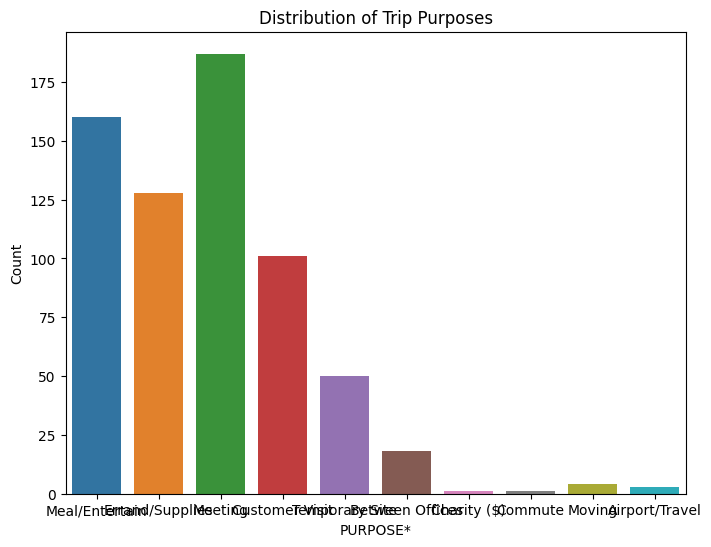

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PURPOSE*', data=df)
plt.title('Distribution of Trip Purposes')
plt.xlabel('PURPOSE*')
plt.ylabel('Count')
plt.show()


MAXIMUM COUNT = 175 for the PURPOSE = MEETINGS 


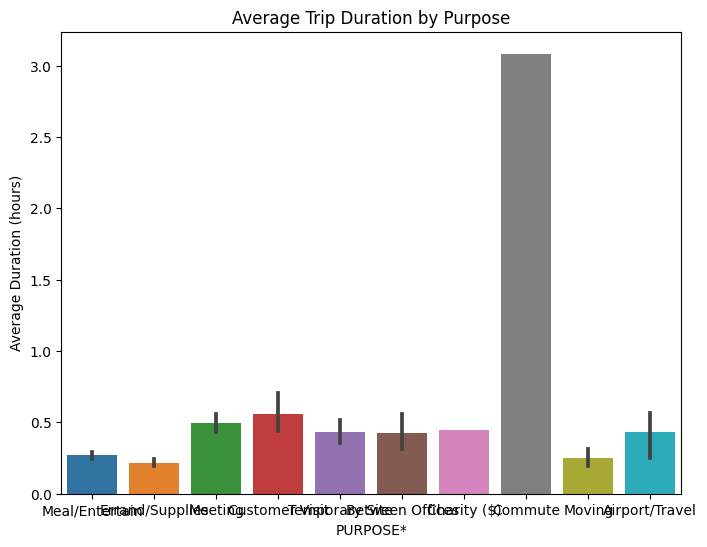

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x='PURPOSE*', y='Duration', data=df, estimator=np.mean)
plt.title('Average Trip Duration by Purpose')
plt.xlabel('PURPOSE*')
plt.ylabel('Average Duration (hours)')
plt.show()


HIGHEST DURATION APPROX 3 HOURS FOR COMMUTE .

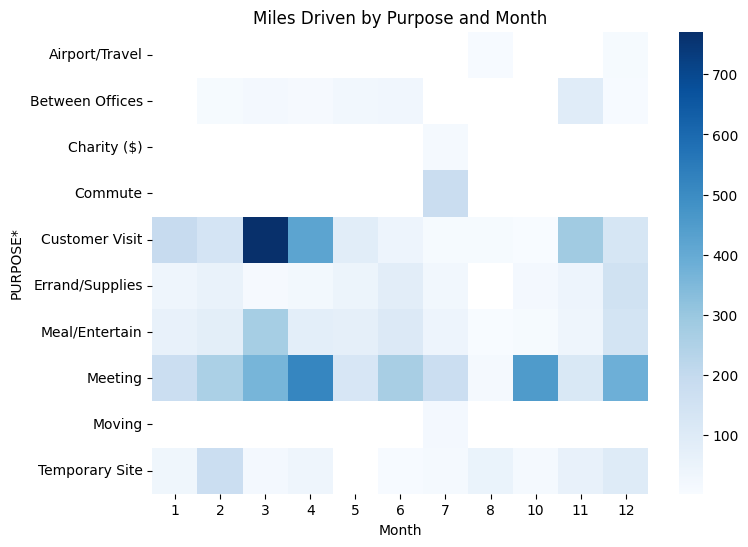

In [13]:
df['Month'] = df['START_DATE*'].dt.month
pivot_table = df.pivot_table(index='PURPOSE*', columns='Month', values='MILES*', aggfunc=np.sum)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='Blues')
plt.title('Miles Driven by Purpose and Month')
plt.xlabel('Month')
plt.ylabel('PURPOSE*')
plt.show()


MAXIMUM COUNTS IN THE HEATMAP is customer visits and meeting (BUISNESS) in the month of MARCH followed by APRIL.

<ipython-input-14-7fd89c14edb0>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hourly_count = hourly_count.pivot('Hour', 'Day of Week', 'START_DATE*')


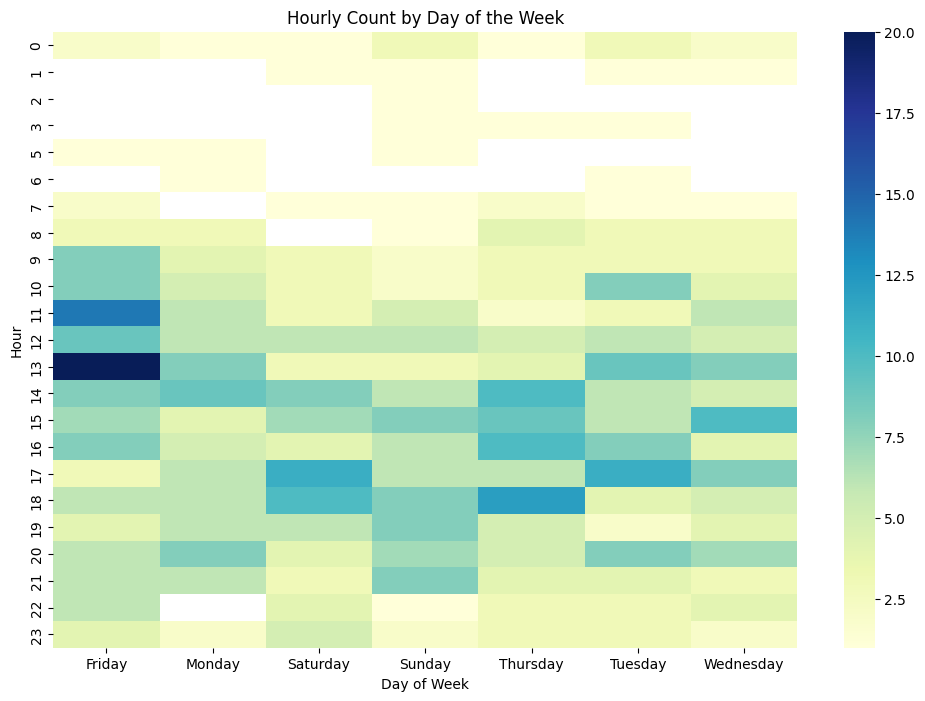

In [14]:
df['Hour'] = df['START_DATE*'].dt.hour
df['Day of Week'] = df['START_DATE*'].dt.day_name()

# Group trips by hour and day of the week and calculate the count
hourly_count = df.groupby(['Hour', 'Day of Week'])['START_DATE*'].count().reset_index()
hourly_count = hourly_count.pivot('Hour', 'Day of Week', 'START_DATE*')

# Plot heatmap of hourly count by day of the week
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_count, cmap='YlGnBu')
plt.title('Hourly Count by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.show()

In [65]:
df = pd.read_csv('uberd.csv')
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

The busiest days are often Fridays as it involves both work and personal commutes , and the buiseist hours are evening and morning .

In [15]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

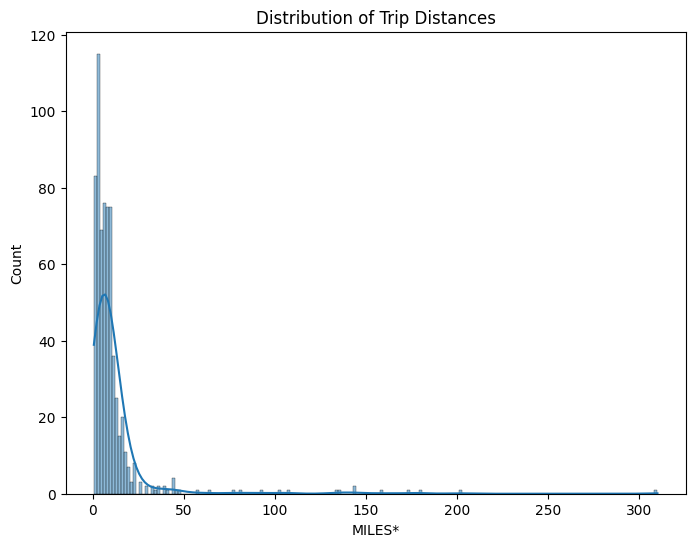

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MILES*', kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('MILES*')
plt.ylabel('Count')
plt.show()


The graph is highly left skewed , which means the 99% of the people travel for under 40 miles .

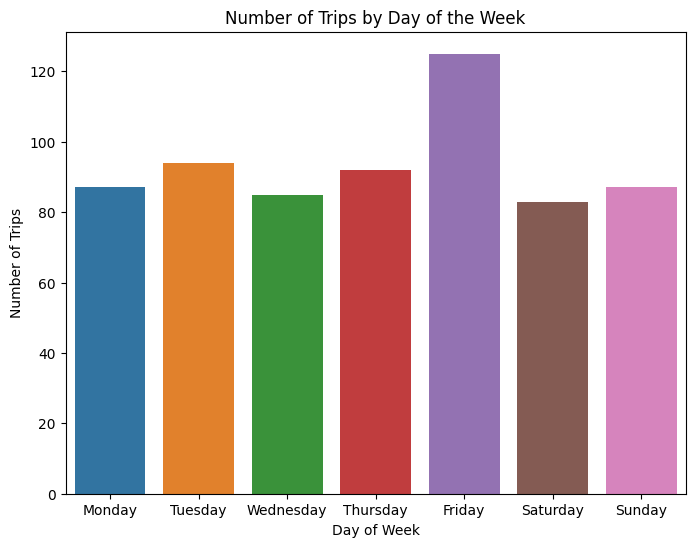

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Day of Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()


In [18]:

df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')
df['MILES*'] = df['MILES*'].astype(str).str.replace(',', '').astype(float)
df['PURPOSE*'] = df['PURPOSE*'].replace({'Meeting - Inside City': 'Meeting', 'Meeting- Outside City': 'Meeting'})

# Print the cleaned data
print(df.head())


          START_DATE*           END_DATE* CATEGORY*           START*  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

             STOP*  MILES*         PURPOSE*  Duration  Month  Hour Day of Week  
0      Fort Pierce     5.1   Meal/Entertain  0.100000      1    21      Friday  
2      Fort Pierce     4.8  Errand/Supplies  0.216667      1    20    Saturday  
3      Fort Pierce     4.7          Meeting  0.233333      1    17     Tuesday  
4  West Palm Beach    63.7   Customer Visit  1.116667      1    14   Wednesday  
5  West Palm Beach     4.3   Meal/Entertain  0.066667      1    17   Wednesday  


<ipython-input-20-42fdb51acc58>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hourly_count_pivot = hourly_count.reset_index().pivot('Hour', 'Day of Week', 'START_DATE*')


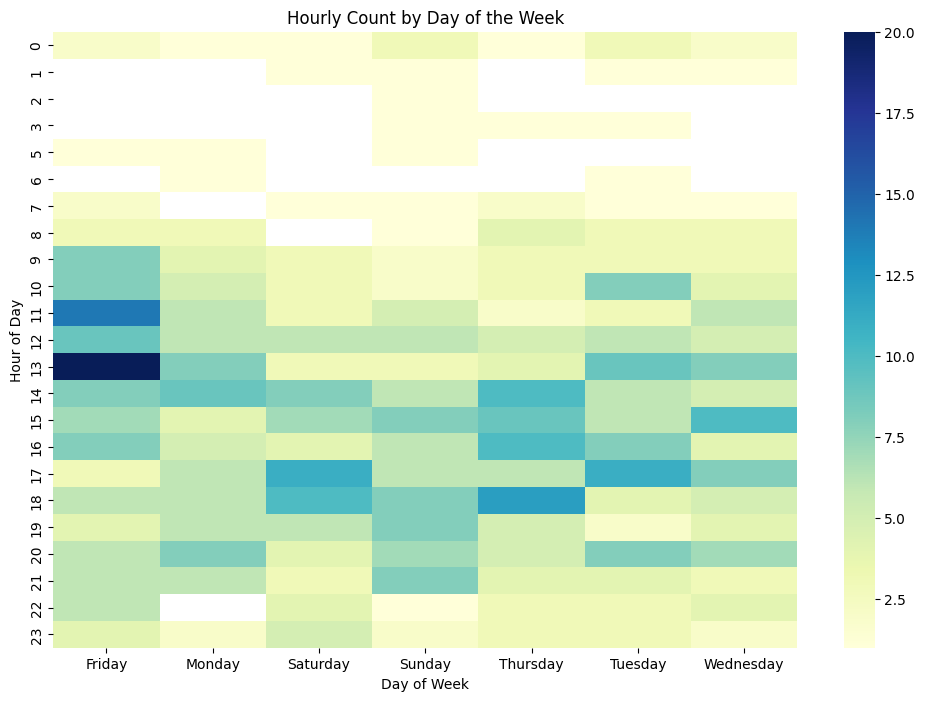

In [20]:
# Create a new column 'Hour'
df['Hour'] = df['START_DATE*'].dt.hour

# Group the data by 'Hour' and 'Day of Week'
hourly_count = df.groupby(['Hour', 'Day of Week'])['START_DATE*'].count()

# Pivot the data to create a heatmap
hourly_count_pivot = hourly_count.reset_index().pivot('Hour', 'Day of Week', 'START_DATE*')

# Plot heatmap of hourly count by day of the week
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_count_pivot, cmap='YlGnBu')
plt.title('Hourly Count by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()


In [21]:
print(df[['START_DATE*', 'Hour', 'Day of Week']].duplicated().sum())


1


In [22]:
print(df[['START_DATE*', 'Hour', 'Day of Week']].isnull().sum())


START_DATE*    0
Hour           0
Day of Week    0
dtype: int64


In [23]:
print(df[['START_DATE*', 'Hour', 'Day of Week']].dtypes)


START_DATE*    datetime64[ns]
Hour                    int64
Day of Week            object
dtype: object


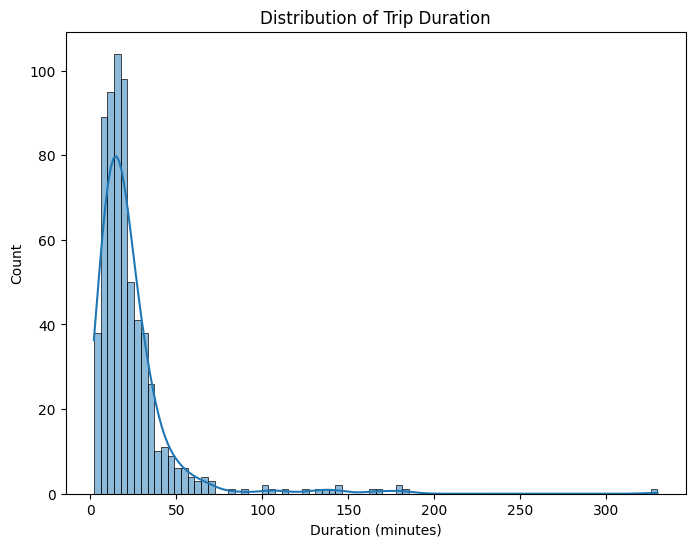

In [24]:
df['Duration'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds() / 60

# Plot histogram of trip duration
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Duration', kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

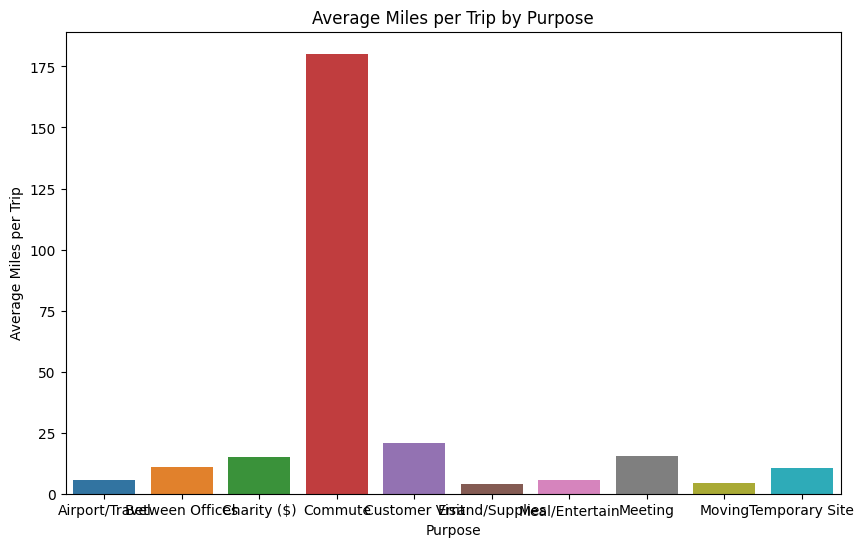

In [25]:

# Group trips by purpose and calculate the count, miles driven, and average miles per trip
user_data = df.groupby('PURPOSE*')['START_DATE*'].agg(['count'])
user_data['MILES*'] = df.groupby('PURPOSE*')['MILES*'].sum()
user_data['Average Miles per Trip'] = user_data['MILES*'] / user_data['count']

# Plot bar chart of average miles per trip by purpose
plt.figure(figsize=(10, 6))
sns.barplot(x=user_data.index, y='Average Miles per Trip', data=user_data)
plt.title('Average Miles per Trip by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Miles per Trip')
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


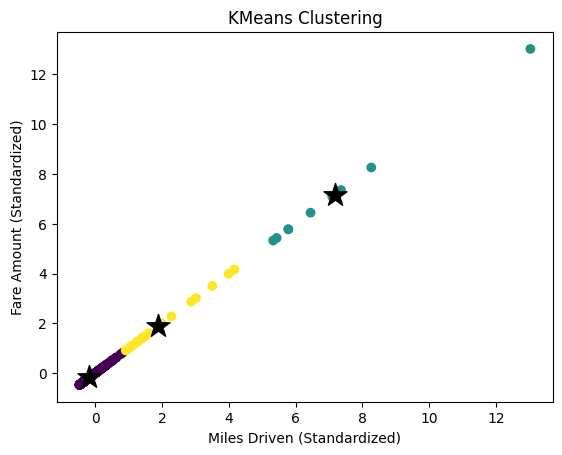

In [28]:
# Load the dataset

# Data cleaning
# (Same code as before)
### K MEANS CLUSTERING 
# Extract relevant features for clustering
X = df[['MILES*', 'Fare Amount']]

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Cluster the data using KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

# Plot the clusters
plt.scatter(X_std[:, 0], X_std[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, color='black')
plt.xlabel('Miles Driven (Standardized)')
plt.ylabel('Fare Amount (Standardized)')
plt.title('KMeans Clustering')
plt.show()


In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# DECISION TREE 

# Separate the features and target variable
X = df[['MILES*', 'PURPOSE*']]
y = df['CATEGORY*']

# Convert categorical features into numerical using One-Hot Encoding
X = pd.get_dummies(X)

# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
tree = DecisionTreeClassifier()

# Train the model using the training set
tree.fit(X_train, y_train)

# Predict on the test set
y_pred = tree.predict(X_test)

# Calculate accuracy score and confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:", cm)



Accuracy: 1.0
Confusion Matrix: [[130   0]
 [  0   1]]


The purpose of this code is to predict the category of Uber rides (Business or Personal) based on the miles driven and the purpose of the drive.
The accuracy score tells us how well the model is performing, and the confusion matrix shows us the number of true positives, true negatives, false positives, and false negatives. These metrics help us to understand the performance of the model and identify areas for improvement.

In [35]:
# Load the dataset

### RANDOM FOREST REGRESSION TO PREDICT RIDER DEMAND
# Data cleaning
# (Same code as before)

# Extract date and hour from Start Date column
df['Date'] = df['START_DATE*'].dt.date
df['Hour'] = df['START_DATE*'].dt.hour

# Group trips by date, hour, and location and calculate the count
location_count = df.groupby(['Date', 'Hour', 'START*'])['START_DATE*'].count().reset_index()

# Feature engineering
location_count['Day of Week'] = pd.to_datetime(location_count['Date']).dt.day_name()
location_count = location_count.drop(['Date'], axis=1)

# One-hot encoding
location_count = pd.get_dummies(location_count, columns=['Day of Week', 'START*'])

# Train-test split
X = location_count.drop(['START_DATE*'], axis=1)
y = location_count['START_DATE*']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training and prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Model evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('R-squared:', r2_score(y_test, y_pred))


Mean Squared Error: 0.04853221655328798


In [34]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the predicted rider demand for the testing set
print(y_pred)


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.05       1.         1.00666667
 1.         1.17071429 1.         1.00666667 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.01       1.00666667 1.
 1.         1.         1.         1.         1.06       1.
 1.         1.         1.         1.         1.04       1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.00666667
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    

In [47]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'Duration', 'Month', 'Hour', 'Day of Week', 'Fare Amount',
       'Date'],
      dtype='object')

In [63]:
print(df.head())

          START_DATE*           END_DATE* CATEGORY*           START*  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

             STOP*  MILES*         PURPOSE*        Duration  Month  Hour  \
0      Fort Pierce     5.1   Meal/Entertain 0 days 00:06:00      1    21   
2      Fort Pierce     4.8  Errand/Supplies 0 days 00:13:00      1    20   
3      Fort Pierce     4.7          Meeting 0 days 00:14:00      1    17   
4  West Palm Beach    63.7   Customer Visit 0 days 01:07:00      1    14   
5  West Palm Beach     4.3   Meal/Entertain 0 days 00:04:00      1    17   

   Day of Week  Fare Amount        Date  
0            4         7.65  2016-01-01  
2            5         7.2